### Import dependencies

In [1]:
from polars_bio.io import read_fastq
from polars_bio.kmer import kmer_count, visualize_kmers

/home/kenjakendi/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:polars_bio:Creating BioSessionContext


### Load Data

In [2]:
file = read_fastq("../../tests/data/io/fastq/example.fastq")

INFO:polars_bio:Table: example registered for path: ../../tests/data/io/fastq/example.fastq


### Count k-mers

In [3]:
k = 5

kmers = kmer_count(
    k = k, 
    df = file,
)

0rows [00:00, ?rows/s]

200rows [00:00, 70380.13rows/s]


### Performance test

In [4]:
import time
import polars_bio as pb

file_path = "../../tests/data/io/fastq/ERR194147.fastq"
test_threads = [1, 2, 4, 8]

try:
    file = read_fastq(file_path)
    for p in test_threads:
        pb.ctx.set_option("datafusion.execution.target_partitions", str(p))
        start = time.time()
        kmer_count(
            k = k, 
            df = file,
        )
        end = time.time()
        print(f"Execution time with {p} threads: {end - start:.2f} seconds")
except:
    print("File not found. Please set correct file path.")

INFO:polars_bio:Table: err194147 registered for path: ../../tests/data/io/fastq/ERR194147.fastq
8240796rows [00:32, 254282.18rows/s] 


Execution time with 1 threads: 80.65 seconds


8240796rows [00:29, 282714.93rows/s] 


Execution time with 2 threads: 54.03 seconds


8240796rows [00:28, 286671.04rows/s]


Execution time with 4 threads: 49.28 seconds


8240796rows [00:30, 269348.23rows/s] 


Execution time with 8 threads: 42.40 seconds


### Show result

In [5]:
display(kmers)

,kmer,count
0,CCGCG,4
1,AATTT,25
2,TGTTG,22
3,AGCTT,20
4,TGACA,17
...,...,...
1015,ACTGC,23
1016,ATAGT,11
1017,CGGTT,2
1018,AATCA,22


In [6]:
kmers.sort_values(by='count', ascending=False)

,kmer,count
831,TTTTT,106
759,GGAGG,63
179,CCCAG,58
779,GGGAG,57
432,CCTCC,53
...,...,...
346,GCGAA,1
744,TAGCG,1
210,GTCGC,1
649,GAACG,1


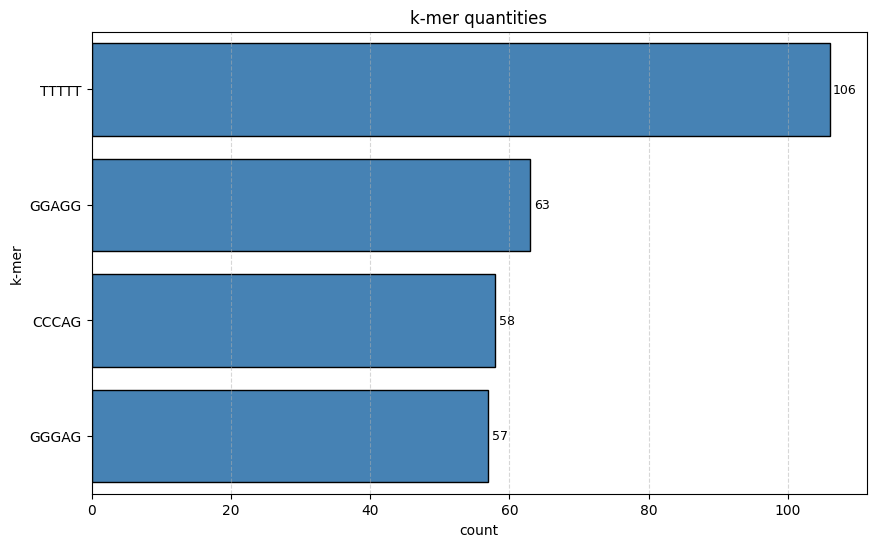

In [7]:
visualize_kmers(
    df = kmers,
    top_n=4,
)

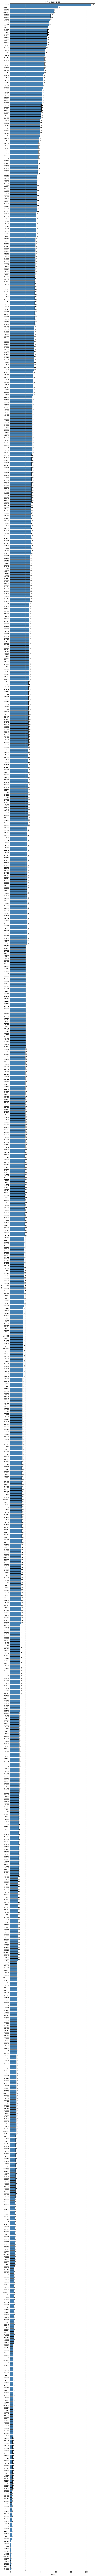

In [8]:
visualize_kmers(
    df = kmers,
)